# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** 5

**Author 1 (sciper):** Camillo Nicolò De Sabbata (335004)  

**Author 2 (sciper):** Gianluca Radi (334736)

**Author 3 (sciper):** Alessandro Dalbesio (352298)

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [2]:
import tarfile
import os

data_base_path = os.path.join(os.curdir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

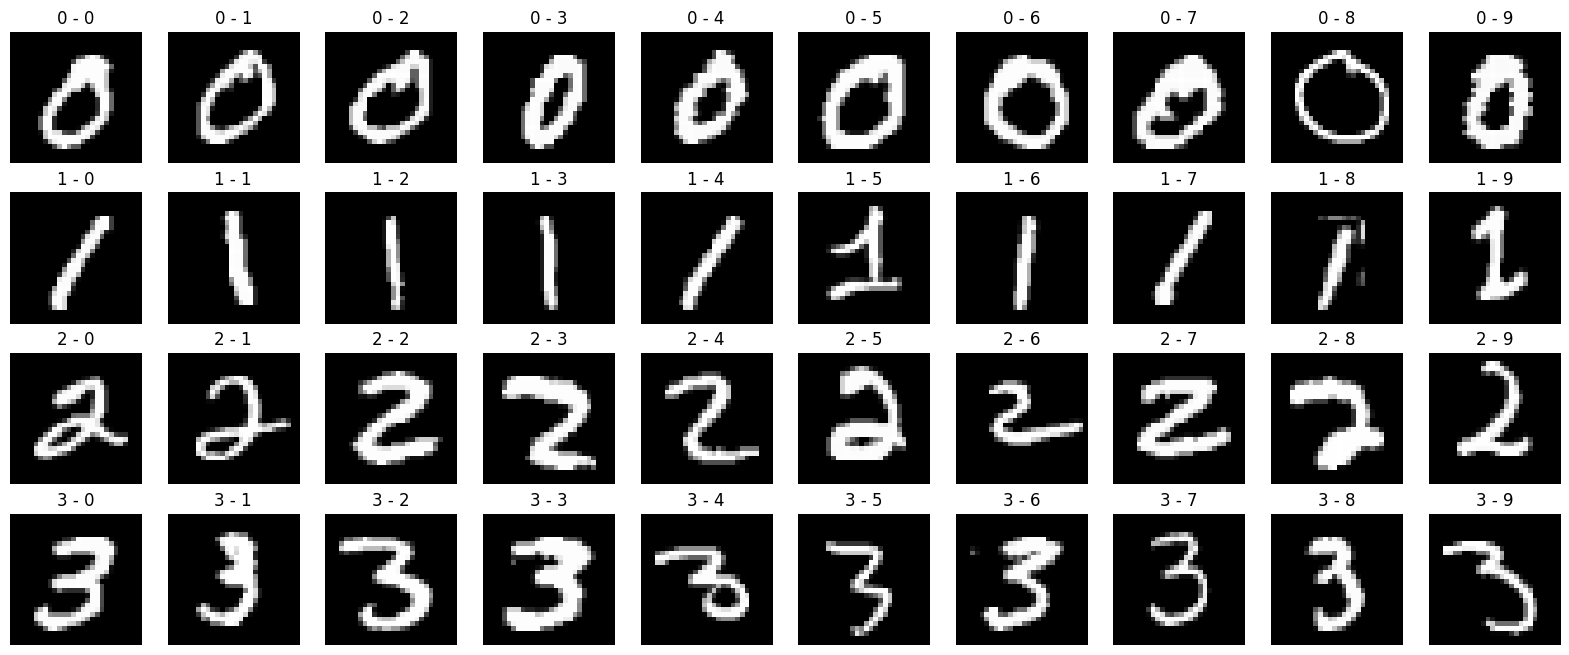

In [3]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Remove the .png from the images names
zeros_names = [nm[:-4].replace('_', ' - ') for nm in zeros_names]
ones_names = [nm[:-4].replace('_', ' - ') for nm in ones_names]
twos_names = [nm[:-4].replace('_', ' - ') for nm in twos_names]
threes_names = [nm[:-4].replace('_', ' - ') for nm in threes_names]

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

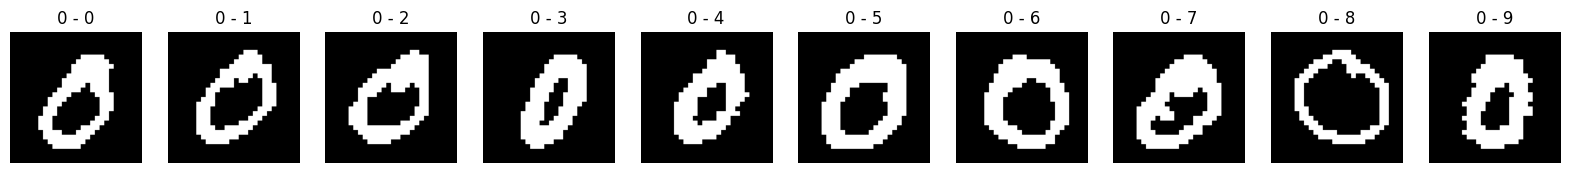

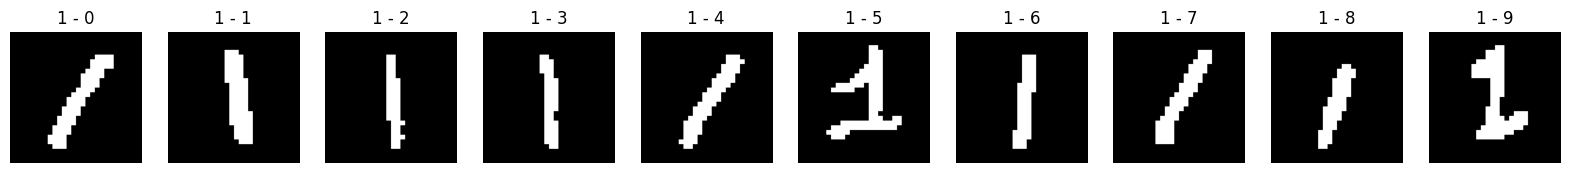

In [4]:
from skimage.filters import unsharp_mask, threshold_otsu
from skimage.morphology import remove_small_objects
import cv2
import numpy as np

# Copy the images into new arrays (to avoid modifying the original ones)
zeros_processed = []
ones_processed = []

# Preprocess images
for i in range(len(zeros_im)):
    img = unsharp_mask(zeros_im[i], radius=100, amount=1.5)
    img = cv2.resize(img, (0,0), fx=10, fy=10, interpolation=cv2.INTER_NEAREST)
    img = img > threshold_otsu(img)
    img = np.ndarray.astype(img, np.uint8)
    img[img == True] = 255
    img[img == False] = 0
    zeros_processed.append(img)

for i in range(len(ones_im)):
    img = unsharp_mask(ones_im[i], radius=100, amount=1.5)
    img = cv2.resize(img, (0,0), fx=10, fy=10, interpolation=cv2.INTER_NEAREST)
    img = img > threshold_otsu(img)
    img = remove_small_objects(img, min_size=750)
    img = np.ndarray.astype(img, np.uint8)
    img[img == True] = 255
    img[img == False] = 0
    ones_processed.append(img)

# Plot zeros
fig, axes = plt.subplots(1, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes, zeros_processed, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

# Plot ones
fig, axes = plt.subplots(1, len(ones_im), figsize=(20, 8))
for ax, im, nm in zip(axes, ones_processed, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

#### Discussion

Since we will work with the contourns we have choosen preprocessing methods that were able to enhance our contourns (since in the original images they are not well defined). To so we have chosen to apply the method <code>unsharp_mask</code> <br>
Since the pixels in the images were not enought to obtain the contourn details with precision we have choosen to increase the number of pixels in all the images. <br>
Then we have choosen to apply thresholding to have a boolean image. <br>
In the case of the ones we removed all the small objects in the images. 

### 1.2. Get descriptors (4 pts)

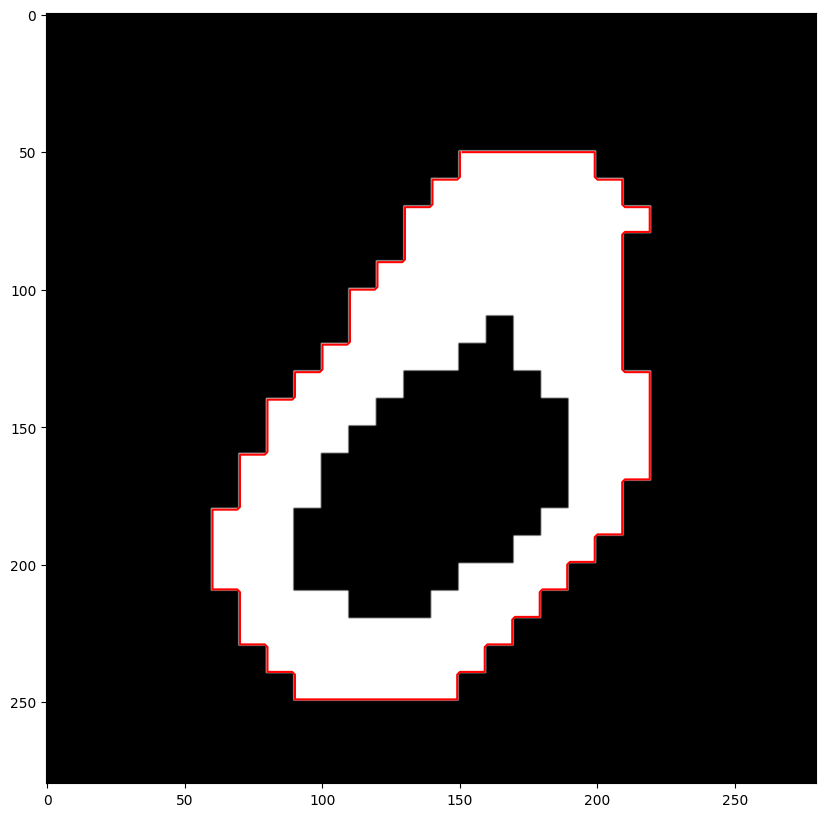

[150.          57.22526912] [150.  50.] 7.2252691193458105
[144.96367532  60.        ] [150.          57.22526912] 5.750104147348207
[140.         62.2615938] [144.96367532  60.        ] 5.454619988185402
[139.65573593  69.34426407] [140.         62.2615938] 7.091032079021926
[132.70208153  70.        ] [139.65573593  69.34426407] 6.984504218032346
[130.          74.52318759] [132.70208153  70.        ] 5.26882060525894
[130.          81.74845671] [130.          74.52318759] 7.2252691193458105
[130.          88.97372583] [130.          81.74845671] 7.2252691193458105
[123.21521861  90.        ] [130.          88.97372583] 6.861960152992334
[120.          94.01005051] [123.21521861  90.        ] 5.139857565420939
[118.17889394 100.        ] [120.          94.01005051] 6.260664679604051
[110.95362482 100.        ] [118.17889394 100.        ] 7.2252691193458105
[110.        106.2716443] [110.95362482 100.        ] 6.343730963959675
[110.         113.49691342] [110.        106.2716443] 7.2

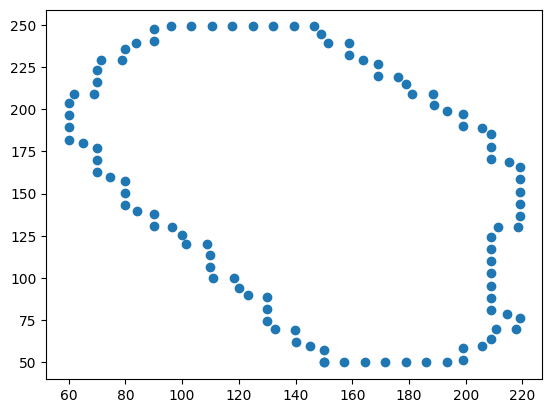

IndexError: tuple index out of range

In [57]:
import cv2
import numpy as np
from scipy.fft import fft

def getOutline(img):
    def distance(p1, p2):
        return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

    # Get the contours with opencv
    contour_points,_ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # Get the external points and dont'approximate the contour
    
    # Plot the contour
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap='gray')
    plt.plot(contour_points[0][:,0,0], contour_points[0][:,0,1], 'r-')
    plt.show()

    # Get the points of the contour in a format easier to work with
    points = np.empty((len(contour_points[0][:,0,0])+1, 2))
    for i in range(len(contour_points[0][:,0,0])):
        points[i] = [contour_points[0][i,0,0], contour_points[0][i,0,1]]
    points[-1] = [contour_points[0][0,0,0], contour_points[0][0,0,1]] # Add the first point to the end to close the contour

    # Get the sum of the distances between the all the points of the contour
    sumOfDistances = 0
    for i in range(len(points)-1):
        sumOfDistances += distance(points[i], points[i+1])
    N = 100
    eps = sumOfDistances/N

    # Interpolate the contour
    currentPoint = points[0]
    nextPoint = points[1]
    k = 1
    contourPoints = [currentPoint]
    while k != len(points)-2:
        dist = 0
        while dist + distance(currentPoint, nextPoint) < eps and k != len(points)-2:
            k += 1
            dist += distance(currentPoint, nextPoint)
            currentPoint = nextPoint
            nextPoint = points[k]
            print(dist)
        d = distance(currentPoint, nextPoint)
        dt = eps - dist
        x0 = currentPoint[0]
        y0 = currentPoint[1]
        x1 = nextPoint[0]
        y1 = nextPoint[1]
        t = dt/d
        contourPoints.append(np.array([x0 + t*(x1-x0), y0 + t*(y1-y0)]))
        print(contourPoints[-1], contourPoints[-2], distance(contourPoints[-1], contourPoints[-2]))
        currentPoint = contourPoints[-1]
    
    # Return the interpolated contour
    return np.array(contourPoints)

def convertPixelToComplex(contour):
    # Set the origin in the lower left corner
    # Plot the contour
    plt.scatter(contour[:,0], contour[:,1])
    plt.show()


def convertComplexToPixel(contour):
    pixelContour = []
    for i in range(len(contour)):
        pixelContour.append([contour[i].real, contour[i].imag])
    return np.array(pixelContour)

def get_descriptors(img: np.ndarray) -> np.ndarray:
    # Interpolate the contour
    points = getOutline(img)
    
    # Convert the points to complex numbers
    points = convertPixelToComplex(points)

    # Apply Fourier transform
    descriptors = fft(points)

    # Return the descriptors
    return descriptors

# Get the descriptors of the zeros
# Convert zeros_processed to 255 if it is True and 0 if it is False
get_descriptors(np.array(zeros_processed[0]))


#### Discussion

TODO

### 1.3. Study effect of descriptors (6 pts)

(289046.05025253166-255773.5355339059j)


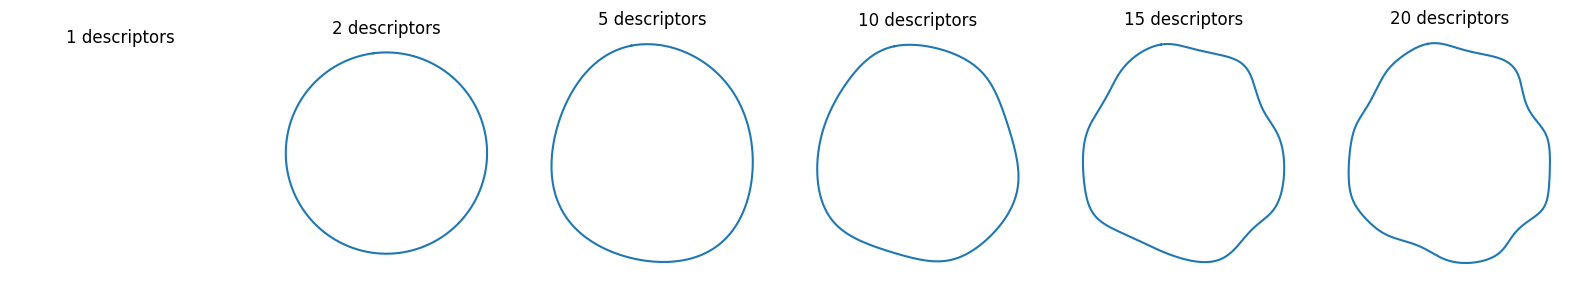

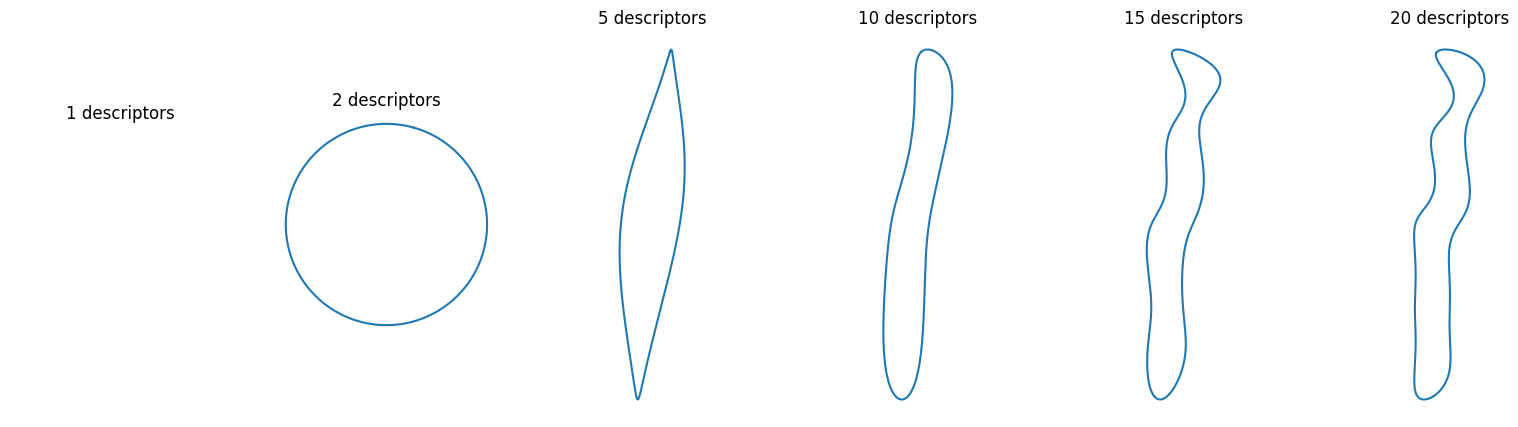

In [13]:
from scipy.fft import ifft

# Define increasing set sizes of the descriptors.
descr_set_sizes = [1, 2, 5, 10, 15, 20]


# Define images for which you will show the recovery.
zero = zeros_processed[6]
one = ones_processed[6]


# Get the descriptors of the images
zeroDescriptors = get_descriptors(zero)
oneDescriptors = get_descriptors(one)


# Reconstruct the images (zero)
zero_reconstructed = []
for size in descr_set_sizes:
    # Reduce the number of descriptors based on the set size
    zeroDescriptorsReduced = zeroDescriptors.copy()
    if size != 1:
        zeroDescriptorsReduced[size//2 +size % 2 :-size//2] = 0
    else:
        zeroDescriptorsReduced[1:] = 0

    # Apply inverse Fourier transform
    zero_reconstructed.append(ifft(zeroDescriptorsReduced))
zero_reconstructed.append(ifft(zeroDescriptors))


# Reconstruct the images (one)
one_reconstructed = []
for size in descr_set_sizes:
    # Reduce the number of descriptors based on the set size
    oneDescriptorsReduced = oneDescriptors.copy()
    if size != 1:
        oneDescriptorsReduced[size//2 +size % 2 :-size//2] = 0
    else:
        oneDescriptorsReduced[1:] = 0
        print(oneDescriptorsReduced[0])

    # Apply inverse Fourier transform
    one_reconstructed.append(ifft(oneDescriptorsReduced))
one_reconstructed.append(ifft(oneDescriptors))

# Plot the results
fig, axes = plt.subplots(1, len(descr_set_sizes), figsize=(20, 5))
for ax, im, nm in zip(axes, zero_reconstructed,descr_set_sizes):
    im = convertComplexToPixel(im)
    ax.plot(im[:,0], im[:,1])
    ax.axis('off')
    ax.set_aspect('equal')
    ax.set_title(f"{nm} descriptors")
plt.show()

fig, axes = plt.subplots(1, len(descr_set_sizes), figsize=(20, 5))
for ax, im, nm in zip(axes, one_reconstructed, descr_set_sizes):
    im = convertComplexToPixel(im)
    ax.plot(im[:,0], im[:,1])
    ax.axis('off')
    ax.set_aspect('equal')
    ax.set_title(f"{nm} descriptors")
plt.show()


#### Discussion

TODO

### 1.4 Clustering (2 pts)

In [14]:
def plot_feature(zeros_f1, zeros_f2, ones_f1, ones_f2, zeros_names, ones_names, title):
    # Get the absolute value of the features
    zeros_f1 = np.abs(zeros_f1)
    zeros_f2 = np.abs(zeros_f2)
    ones_f1 = np.abs(ones_f1)
    ones_f2 = np.abs(ones_f2)
    
    # Plot features for all images
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    
    # Plot the features of the zeros
    ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
    for i, txt in enumerate(zeros_names):
        ax.annotate(txt.split("_")[1].split(".")[0], (zeros_f1[i]+5, zeros_f2[i]+5))
    
    # Plot the features of the ones
    ax.scatter(ones_f1, ones_f2, color='b', label='ones')
    for i, txt in enumerate(ones_names):
        ax.annotate(txt.split("_")[1].split(".")[0], (ones_f1[i]+5, ones_f2[i]+5))

    # Set the labels and the title
    ax.set_xlabel("First feature")
    ax.set_ylabel("Second feature")
    ax.legend(loc='best')
    plt.title(title)
    plt.show()

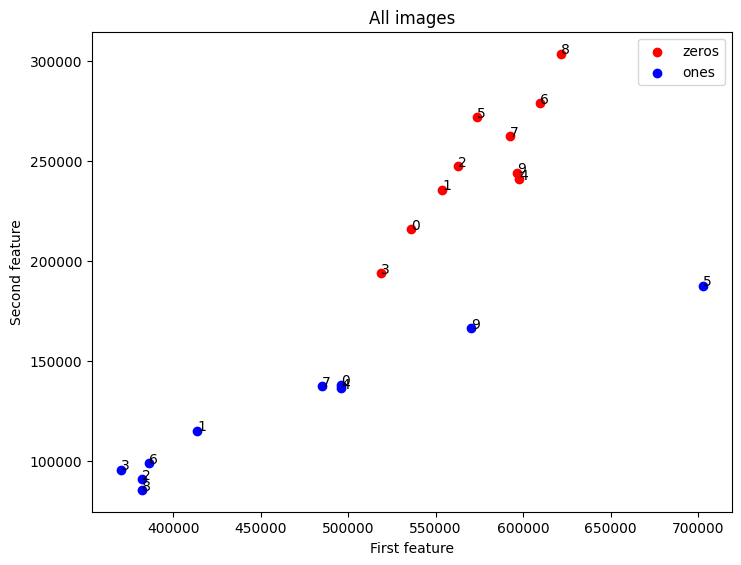

In [7]:
# First feature for all "0"s
zeros_f1 = []
# Second feature for all "0"s
zeros_f2 = []
# Fist feature for all "1"s
ones_f1 = []
# Second feature for all "1"s
ones_f2 = []

# Loop for each zero image
for zero in zeros_processed:
    # Get the descriptors of the image
    descriptors = get_descriptors(zero)
    # Add the first feature
    zeros_f1.append(abs(descriptors[0]))
    # Add the second feature
    zeros_f2.append(abs(descriptors[1]))


# Loop for each one image
for one in ones_processed:
    # Get the descriptors of the image
    descriptors = get_descriptors(one)
    # Add the first feature
    ones_f1.append(abs(descriptors[0]))
    # Add the second feature
    ones_f2.append(abs(descriptors[1]))

# Plot features for all images
plot_feature(zeros_f1, zeros_f2, ones_f1, ones_f2, zeros_names, ones_names, "All images")

#### Discussion


TODO

### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

TODO

#### Implementation

In [8]:

def get_invariant_features(img, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    img_descriptors = get_descriptors(img)

    if inv_to_translation:
        img_descriptors = img_descriptors[1:]

    if inv_to_rotation:
        img_descriptors = abs(img_descriptors)
    
    if inv_to_scale:
        img_descriptors = img_descriptors/img_descriptors[2]

    return img_descriptors

def random_rotate(img, rotation_angle):
    rotatedImage = skimage.transform.rotate(img, rotation_angle)
    return skimage.img_as_ubyte(rotatedImage)

def random_translate(img, tx, ty):
    newImage = np.zeros((img.shape[0] + tx, img.shape[1] + ty), dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            newImage[i + tx, j + ty] = img[i, j]
    return newImage

    
# Define custom rotation function. You may add other parameters to the function.
def random_scale(img, scaleFactor):
    scaledImage = skimage.transform.resize(img, (img.shape[0] * scaleFactor, img.shape[1] * scaleFactor),anti_aliasing=True)
    return skimage.img_as_ubyte(scaledImage)

##### Invariant to translation

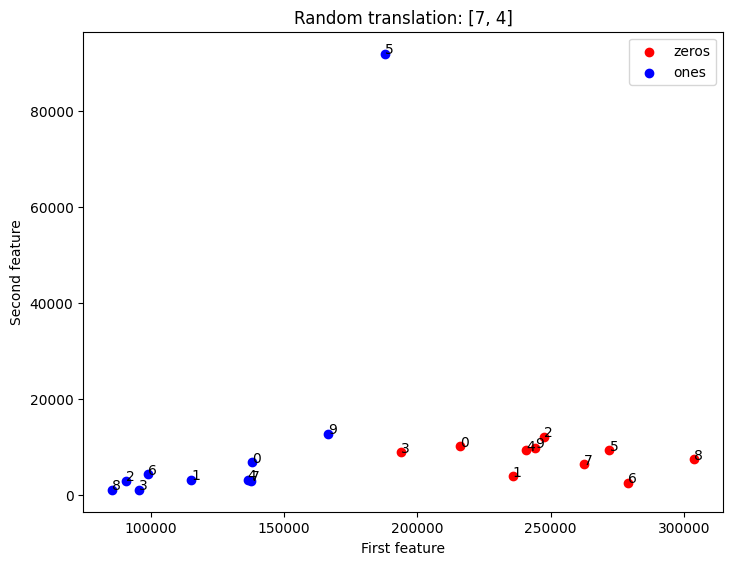

In [14]:
tx = np.random.randint(0, 10)
ty = np.random.randint(0, 10) # Bug if ty <= 5
zeros_f1 = []
zeros_f2 = []
ones_f1 = []
ones_f2 = []
for i in range(len(zeros_processed)):
    zero_processed_translated = random_translate(zeros_processed[i], tx, ty)
    descriptors = get_invariant_features(zero_processed_translated, inv_to_translation=True)
    zeros_f1.append(abs(descriptors[0]))
    zeros_f2.append(abs(descriptors[1]))

for i in range(len(ones_processed)):
    one_processed_translated = random_translate(ones_processed[i], tx, ty)
    descriptors = get_invariant_features(one_processed_translated, inv_to_translation=True)
    ones_f1.append(abs(descriptors[0]))
    ones_f2.append(abs(descriptors[1]))

plot_feature(zeros_f1, zeros_f2, ones_f1, ones_f2, zeros_names, ones_names, f"Random translation: [{tx}, {ty}]")


##### Invariant to rotation

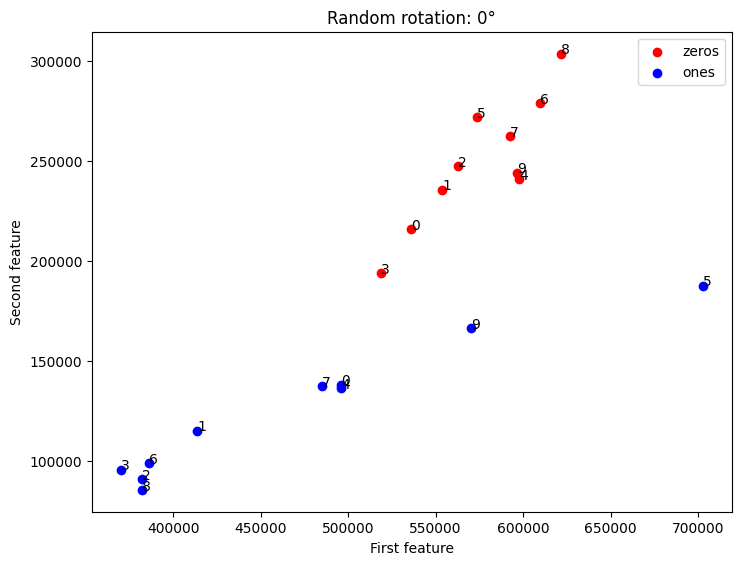

In [18]:
rotation = np.random.randint(0, 4)
rotation = [0, 90, 180, 270][rotation]
zeros_f1 = []
zeros_f2 = []
ones_f1 = []
ones_f2 = []
for i in range(len(zeros_processed)):
    zero_processed_rotated = random_rotate(zeros_processed[i], rotation)
    descriptors = get_invariant_features(zero_processed_rotated, inv_to_rotation=True)
    zeros_f1.append(abs(descriptors[0]))
    zeros_f2.append(abs(descriptors[1]))

for i in range(len(ones_processed)):
    one_processed_rotated = random_rotate(ones_processed[i], rotation)
    descriptors = get_invariant_features(one_processed_rotated, inv_to_rotation=True)
    ones_f1.append(abs(descriptors[0]))
    ones_f2.append(abs(descriptors[1]))

plot_feature(zeros_f1, zeros_f2, ones_f1, ones_f2, zeros_names, ones_names, f"Random rotation: {rotation}°")

##### Invariant to scaling

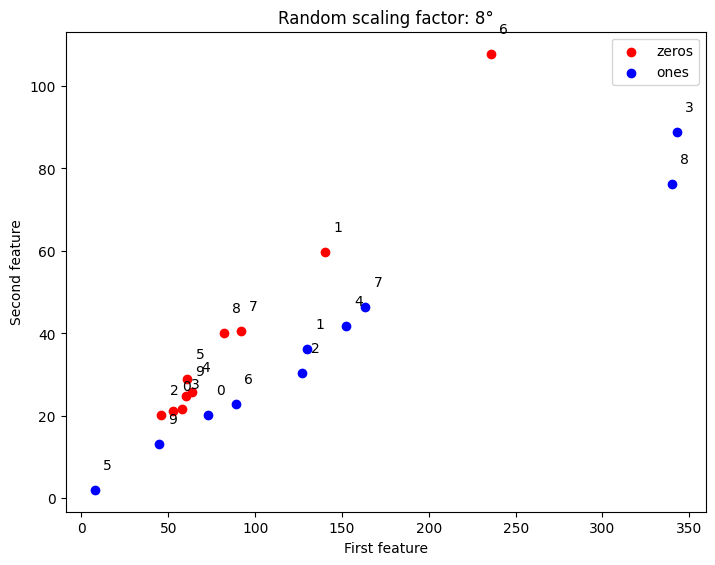

In [28]:
scaling = np.random.randint(1, 10)
zeros_f1 = []
zeros_f2 = []
ones_f1 = []
ones_f2 = []
for i in range(len(zeros_processed)):
    zero_processed_rotated = random_scale(zeros_processed[i], scaling)
    descriptors = get_invariant_features(zero_processed_rotated, inv_to_scale=True)
    zeros_f1.append(abs(descriptors[0]))
    zeros_f2.append(abs(descriptors[1]))

for i in range(len(ones_processed)):
    one_processed_rotated = random_scale(ones_processed[i], scaling)
    descriptors = get_invariant_features(one_processed_rotated, inv_to_scale=True)
    ones_f1.append(abs(descriptors[0]))
    ones_f2.append(abs(descriptors[1]))

plot_feature(zeros_f1, zeros_f2, ones_f1, ones_f2, zeros_names, ones_names, f"Random scaling factor: {scaling}°")

#### Discussion

TODO

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.3. Cluster on compacity (6 pts)

In [ ]:
# TODO

In [ ]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = []
twos_f2 = []
threes_f1 = []
threes_f2 = []

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

In [ ]:
# TODO: Make the 1D plot of the compacity

####  Discussion

TODO

### 2.2. Additional method (4 pts)

In [ ]:
# TODO

#### Discussion

TODO